In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
image = cv2.imread("images/image.jpg")
grey = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

for row in range(image.shape[0]):
    for col in range(image.shape[1]):
        blue, green, red = image[row, col][:3]
        grey[row, col] = 0.299 * red + 0.587 * green + 0.114 * blue

In [18]:
cv2.imshow("Original", grey)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Brightness


In [21]:
import cv2
import numpy as np

# Step 1: Load the image
image = cv2.imread("images/image.jpg")

brightness_factor = 100

# Step 3: Adjust brightness
brightened_image = cv2.add(
    image, np.ones(image.shape, dtype="uint8") * brightness_factor
)

# Step 4: Display images side by side


cv2.imshow("Brightened Image (Right)", brightened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Gamma Corection


In [26]:
import cv2
import numpy as np

image = cv2.imread("images/image.jpg")

gamma = 2.2  # You can change this value to make the image brighter (<1) or darker (>1)

# Step 3: Normalize the input image and apply gamma correction
normalized = image / 255.0
gamma_corrected = np.power(normalized, gamma)

# Step 4: Scale back to [0, 255] range and convert to uint8
gamma_corrected = np.uint8(gamma_corrected * 255)


cv2.imshow(" Gamma Corrected Image", gamma_corrected)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Green Screen


In [37]:
CJ = cv2.imread("images/cj.webp")
BUIC = cv2.imread("images/buic.jpg")

CJ = cv2.resize(CJ, (BUIC.shape[1], BUIC.shape[0]))

lowerRange = np.array([0, 60, 0])
upparRange = np.array([60, 255, 60])

cjMask = cv2.inRange(CJ, lowerRange, upparRange)

In [40]:
CJ[cjMask != 0] = [0, 0, 0]
BUIC[cjMask == 0] = [0, 0, 0]

In [41]:
greenEffect = cv2.add(CJ, BUIC)

In [42]:
cv2.imshow("Gamma Corrected Image", greenEffect)
cv2.waitKey(0)
cv2.destroyAllWindows()

(344, 612)


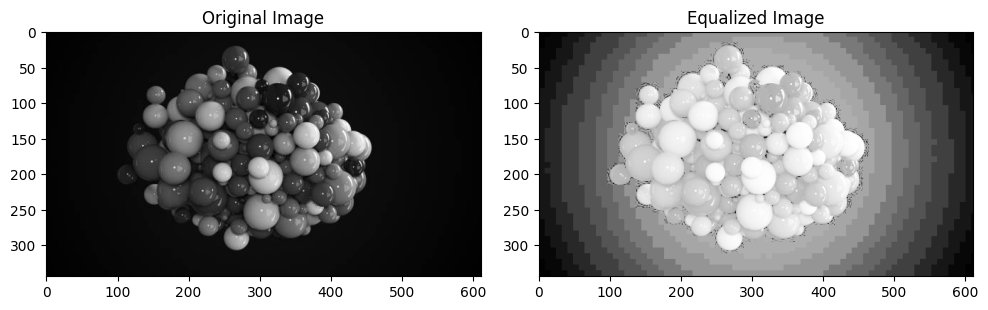

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("images/image.jpg", cv2.IMREAD_GRAYSCALE)  # 0 loads in grayscale
print(image.shape)

# Step 2: Calculate the histogram
hist = np.zeros(256)
for (
    pixel_value
) in image.ravel():  # Flatten the image array and iterate through each pixel
    hist[pixel_value] += 1

# Step 3: Calculate the cumulative distribution function (CDF)
cdf = hist.cumsum()

# Step 4: Normalize the CDF to range [0, 255]
cdf_min = cdf.min()
cdf_max = cdf.max()
cdf_normalized = ((cdf - cdf_min) * 255 / (cdf_max - cdf_min)).astype(np.uint8)

# Step 5: Map the original image pixels to equalized values using the normalized CDF
equalized_image = cdf_normalized[image]

# Step 6: Display the original and equalized images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap="gray")
plt.title("Equalized Image")

plt.tight_layout()
plt.show()

In [63]:
image.ravel().min(), image.ravel().max()

(np.uint8(0), np.uint8(255))